# **Tugas Besar IF2120 Probabilitas dan Statistika 2025/2026**

### Topik : **Life-style**


K12 - Kelompok FRL

Anggota Kelompok :
1. Irvin Tandiarrang Sumual - 13524030
2. Nathaniel Christian - 13524122

## Inisialisasi Dependencies dan Load Data

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

Load Data

In [ ]:
import gdown

file_id = "1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM"

url = f"https://drive.google.com/uc?id={file_id}"

nama_dataset = "life-style"
output = f"{nama_dataset}.csv"
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)
data.info()

Downloading...
From: https://drive.google.com/uc?id=1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM
To: /content/life-style.csv
100%|██████████| 233k/233k [00:00<00:00, 28.4MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2000 non-null   float64
 1   Gender                    2000 non-null   object 
 2   Weight (kg)               2000 non-null   float64
 3   Height (m)                2000 non-null   float64
 4   Avg_BPM                   2000 non-null   float64
 5   Session_Duration (hours)  2000 non-null   float64
 6   Calories_Burned           2000 non-null   float64
 7   Workout_Type              2000 non-null   object 
 8   Fat_Percentage            2000 non-null   float64
 9   Carbs                     2000 non-null   float64
 10  Proteins                  2000 non-null   float64
 11  Fats                      2000 non-null   float64
 12  Calories                  2000 non-null   float64
 13  BMI                       2000 non-null   float64
 14  diet_typ

In [ ]:
data.head(5)

print(f"\nDimensions: {data.shape[0]} rows x {data.shape[1]} columns")


Dimensions: 2000 rows x 16 columns


# Soal General

## Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data.
- Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.
- Data yang bersifat kategorikal dapat dicari unique values, dan proporsi nya.

In [ ]:
numerical_cols = data.select_dtypes(include=[np.float64]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

### Implementasi Menggunakan Fungsi Buatan Sendiri

Data Numerik

In [ ]:
print("Deskripsi Statistika u/ data numerik (w/o using Library):")
print("\n")

for col in numerical_cols:

    print(f"--- Column: {col} ---")

    # Ambil data dan sort
    data_list = data[col].tolist()
    data_sorted = sorted(data_list)
    length = len(data_list)

    # Mean
    mean = sum(data_list) / length
    print(f"Mean: {mean:.2f}")

    # Median
    if length % 2 == 1:
        median = data_sorted[length//2]
    else:
        median = (data_sorted[length//2 - 1] + data_sorted[length//2]) / 2
    print(f"Median: {median:.2f}")

    # Modus
    counts = {}
    for x in data_list:
        counts[x] = counts.get(x, 0) + 1

    max_count = max(counts.values())
    modus = [k for k, v in counts.items() if v == max_count]

    if len(modus) == length:
        print("Modus: - ")
    else:
        print("Modus: " + ", ".join(f"{m:.2f}" for m in modus))

    # Min, Max, Range
    min_val = data_sorted[0]
    max_val = data_sorted[-1]
    r = max_val - min_val

    print(f"Min: {min_val:.2f}")
    print(f"Max: {max_val:.2f}")
    print(f"Range: {r:.2f}")

    # Variansi & standar dev
    sum2 = sum((x - mean)**2 for x in data_list)
    variansi = sum2 / (length - 1)
    standar_deviasi = variansi**0.5

    print(f"Variance: {variansi:.2f}")
    print(f"Standar deviasi: {standar_deviasi:.2f}")

    # Qs
    if length % 2 == 1:
        lower = data_sorted[:length//2]
        upper = data_sorted[length//2 + 1:]
    else:
        lower = data_sorted[:length//2]
        upper = data_sorted[length//2:]

    # Q1
    ln = len(lower)
    if ln % 2 == 1:
        q1 = lower[ln//2]
    else:
        q1 = (lower[ln//2 - 1] + lower[ln//2]) / 2

    # Q3
    un = len(upper)
    if un % 2 == 1:
        q3 = upper[un//2]
    else:
        q3 = (upper[un//2 - 1] + upper[un//2]) / 2

    iqr = q3 - q1

    print(f"Q1 : {q1:.2f}")
    print(f"Q3 : {q3:.2f}")
    print(f"IQR: {iqr:.2f}")

    # Skewness
    if standar_deviasi != 0 and length > 2:
        sum3 = sum((x - mean)**3 for x in data_list)
        skew = (length / ((length - 1)*(length - 2))) * (sum3 / (standar_deviasi**3))
        print(f"Skewness: {skew:.2f}")
    else:
        print("Skewness: None")

    # Kurtosis
    if standar_deviasi != 0 and length > 3:
        sum4 = sum((x - mean)**4 for x in data_list)
        kurtosis = (
            (length*(length+1))/((length-1)*(length-2)*(length-3)) * (sum4 / standar_deviasi**4)
            - (3*(length-1)**2)/((length-2)*(length-3))
        )
        print(f"Kurtosis: {kurtosis:.2f}")
    else:
        print("Kurtosis: None")

    print("\n")


Deskripsi Statistika u/ data numerik (w/o using Library):


--- Column: Age ---
Mean: 38.94
Median: 39.91
Modus: 18.00
Min: 18.00
Max: 59.41
Range: 41.41
Variance: 146.26
Standard Deviation: 12.09
Q1 : 28.26
Q3 : 49.78
IQR: 21.52
Skewness: -0.11
Kurtosis: -1.19


--- Column: Weight (kg) ---
Mean: 73.82
Median: 69.15
Modus: 88.13
Min: 39.32
Max: 130.55
Range: 91.23
Variance: 461.23
Standard Deviation: 21.48
Q1 : 58.01
Q3 : 86.44
IQR: 28.43
Skewness: 0.80
Kurtosis: -0.04


--- Column: Height (m) ---
Mean: 1.72
Median: 1.71
Modus: 1.68
Min: 1.49
Max: 2.01
Range: 0.52
Variance: 0.02
Standard Deviation: 0.13
Q1 : 1.62
Q3 : 1.80
IQR: 0.18
Skewness: 0.33
Kurtosis: -0.70


--- Column: Avg_BPM ---
Mean: 143.86
Median: 143.07
Modus: 149.80, 120.14, 131.00, 166.91, 123.12, 138.96
Min: 119.35
Max: 169.56
Range: 50.21
Variance: 207.68
Standard Deviation: 14.41
Q1 : 131.28
Q3 : 156.65
IQR: 25.38
Skewness: 0.08
Kurtosis: -1.21


--- Column: Session_Duration (hours) ---
Mean: 1.26
Median: 1.26
Modus: 

Data Kategorikal

In [ ]:
print("Deskripsi Statistika u/ data kategorikal (w/o using Library):\n")

for col in categorical_cols:
    print(f"--- Column: {col} ---")

    values = data[col].tolist()
    length = len(values)

    # hitung frekuensi
    freq = {}
    for v in values:
        if v in freq:
            freq[v] += 1
        else:
            freq[v] = 1

    categories = []
    counts = []
    proportions = []

    for category, count in freq.items():
        categories.append(category)
        counts.append(count)
        proportions.append(f"{count/length:.2%}")

    summary = pd.DataFrame({
        "Category": categories,
        "Count": counts,
        "Proportion": proportions
    })

    summary = summary.set_index("Category")
    summary.index.name = None

    print(summary.to_string())
    print("\n")


Deskripsi Statistika u/ data kategorikal (w/o using Library):

--- Column: Gender ---
        Count Proportion
Female    979     48.95%
Male     1021     51.05%


--- Column: Workout_Type ---
          Count Proportion
Cardio      509     25.45%
Strength    486     24.30%
HIIT        490     24.50%
Yoga        515     25.75%


--- Column: diet_type ---
            Count Proportion
Balanced      324     16.20%
Keto          350     17.50%
Paleo         349     17.45%
Vegetarian    315     15.75%
Vegan         315     15.75%
Low-Carb      347     17.35%




### Implementasi Menggunakan Library

#### Data Numerik

In [ ]:
print("Deskripsi Statistika u/ data numerik (using Library):")
print("\n")

for col in numerical_cols:
    print(f"--- Column: {col} ---")
    print(f"Mean: {data[col].mean():.2f}")
    print(f"Median: {data[col].median():.2f}")

    modus = data[col].mode()
    if len(modus) > 1:
        print(f"Modus: {', '.join([f'{m:.2f}' for m in modus])}")
    else:
        print(f"Modus: {modus[0]:.2f}")

    print(f"Standar Deviasi: {data[col].std():.2f}")
    print(f"Variansi: {data[col].var():.2f}")
    print(f"Min: {data[col].min():.2f}")
    print(f"Max: {data[col].max():.2f}")
    print(f"Range: {data[col].max() - data[col].min():.2f}")

    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    print(f"Q1 : {q1:.2f}")
    print(f"Q3 : {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Skewness: {data[col].skew():.2f}")
    print(f"Kurtosis: {data[col].kurt():.2f}")
    print("\n")

Deskripsi Statistika u/ data numerik (using Library):


--- Column: Age ---
Mean: 38.94
Median: 39.91
Modus: 18.00
Standar Deviasi: 12.09
Variansi: 146.26
Min: 18.00
Max: 59.41
Range: 41.41
Q1 : 28.26
Q3 : 49.78
IQR: 21.52
Skewness: -0.11
Kurtosis: -1.19


--- Column: Weight (kg) ---
Mean: 73.82
Median: 69.15
Modus: 88.13
Standar Deviasi: 21.48
Variansi: 461.23
Min: 39.32
Max: 130.55
Range: 91.23
Q1 : 58.02
Q3 : 86.43
IQR: 28.41
Skewness: 0.80
Kurtosis: -0.04


--- Column: Height (m) ---
Mean: 1.72
Median: 1.71
Modus: 1.68
Standar Deviasi: 0.13
Variansi: 0.02
Min: 1.49
Max: 2.01
Range: 0.52
Q1 : 1.62
Q3 : 1.80
IQR: 0.18
Skewness: 0.33
Kurtosis: -0.70


--- Column: Avg_BPM ---
Mean: 143.86
Median: 143.07
Modus: 120.14, 123.12, 131.00, 138.96, 149.80, 166.91
Standar Deviasi: 14.41
Variansi: 207.68
Min: 119.35
Max: 169.56
Range: 50.21
Q1 : 131.28
Q3 : 156.63
IQR: 25.35
Skewness: 0.08
Kurtosis: -1.21


--- Column: Session_Duration (hours) ---
Mean: 1.26
Median: 1.26
Modus: 1.26
Standar Dev

#### Data Kategorikal

In [ ]:
print("Deskripsi Statistika u/ data kategorikal (using Library):\n")

for col in categorical_cols:
    print(f"--- Column: {col} ---")

    count = data[col].value_counts()
    proportions = data[col].value_counts(normalize=True).apply(lambda x: f"{x:.2%}")

    count.index.name = None
    proportions.index.name = None

    summary = pd.DataFrame({
        "Count": count,
        "Proportion": proportions
    })

    print(summary.to_string())
    print("\n")


Deskripsi Statistika u/ data kategorikal (using Library):

--- Column: Gender ---
        Count Proportion
Male     1021     51.05%
Female    979     48.95%


--- Column: Workout_Type ---
          Count Proportion
Yoga        515     25.75%
Cardio      509     25.45%
HIIT        490     24.50%
Strength    486     24.30%


--- Column: diet_type ---
            Count Proportion
Keto          350     17.50%
Paleo         349     17.45%
Low-Carb      347     17.35%
Balanced      324     16.20%
Vegetarian    315     15.75%
Vegan         315     15.75%




#### Perbandingan Hasil Fungsi Buatan Sendiri dengan Library

Jelaskan apakah implementasi deskripsi statistika dengan menggunakan fungsi buatan sendiri dan menggunakan library menghasilkan nilai yang sama?

## Nomor 2
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

Ya, kami dapat.
Terdapat dua metode yang seringkali dilakukan untuk menangani outliers.
1. Removal
Metode ini dilakukan dengan cara menghapus data outlier yang diyakini disebabkan oleh kesalahan atau tidak relevan dengan analisis yang akan dilakukan
2. Imputation
Metode ini dilakukan dengan cara mengisi nilai yang dianggap outlier dengan nilai lainnya. Nilai pengganti dapat berasal dari media, mean, atau modus

In [ ]:
# using z-score
def detect_outliers(column_data):
  mean = column_data.mean()
  std_dev = column_data.std()

  if std_dev == 0:
    return np.array([])

  z_scores = np.abs((column_data - mean)/std_dev)
  outliers = np.where(z_scores > 3)[0]
  return outliers

outliers_dict = {}
numerical_cols = data.select_dtypes(include=[np.float64]).columns
for col in numerical_cols:
  outliers_dict[col] = detect_outliers(data[col])

# print out
for col, idx in outliers_dict.items():
    print(f"Column '{col}' has {len(idx)} outliers at index: {idx}")

Column 'Age' has 0 outliers at indices: []
Column 'Weight (kg)' has 0 outliers at indices: []
Column 'Height (m)' has 0 outliers at indices: []
Column 'Avg_BPM' has 0 outliers at indices: []
Column 'Session_Duration (hours)' has 0 outliers at indices: []
Column 'Calories_Burned' has 11 outliers at indices: [  96  132  406  534  577  644  871 1095 1143 1154 1503]
Column 'Fat_Percentage' has 0 outliers at indices: []
Column 'Carbs' has 16 outliers at indices: [   6   47  114  162  224  249  270  390  412  831  948  963 1059 1090
 1389 1752]
Column 'Proteins' has 16 outliers at indices: [   6   47  114  162  224  249  270  390  412  831  948  963 1059 1090
 1389 1752]
Column 'Fats' has 17 outliers at indices: [   6   47  114  151  162  224  249  270  390  412  831  948  963 1059
 1090 1389 1752]
Column 'Calories' has 0 outliers at indices: []
Column 'BMI' has 20 outliers at indices: [ 112  156  191  199  341  355  464  498  509  669  991 1053 1170 1171
 1180 1241 1247 1631 1697 1745]
Colu

Jelaskan hasil dan bagaimana cara kalian melakukan pengecekan outlier disini.

Penjelasan Hasil :
Pada kolom Calories_Burned terdapat 11 outliers, pada kolom Carbs terdapat 16 outliers, pada kolom Proteins terdapat 16 outliers, pada Column Fats terdapat 17 outliers, pada kolom BMI terdapat 20 outliers, dan pada kolom cal_balance terdapat 1 outliers. Pada kolom sisanya tidak terdapat outliers

Penjelasan Cara :
Kami menggunakan metode Z-score yang merupakan ukuran berapa banyak deviasi standar suatu pengamatan dari rata-rata. Suatu titik terdeteksi outlier ketika memiliki nilai Z-score lebih besar dari 3 atau kurang dari -3. Perhitungan dilakukan dengan cara mengurangkan nilai tiap observasi di variabel tertentu dengan nilai rata-rata dari variable tersebut dan setelah itu dibagi dengan standar deviasi variabel itu sendiri

### Penanganan Outlier

Jelaskan metode yang Anda gunakan untuk menangani outlier pada bagian ini, beserta alasan pemilihan metode tersebut.

Metode yang digunakan adalah metode removal. Metode ini akan menghapus data-data yang tergolong sebagai outlier. Data yang tergolong sebagai outlier telah dideteksi pada bagian sebelumnya dan di bagian sebelumnya telah terdapat indeks yang menandakan baris yang memiliki outlier sehingga pada bagian ini cukup mencari union index-index yang ada dan menghapusnya. Metode ini dipilih karena outlier pada data tidak begitu banyak.

In [ ]:
union_outliers = set()
for indices in outliers_dict.values():
  union_outliers.update(indices)

cleaned_data = np.delete(data, list(union_outliers), axis = 0)
data = pd.DataFrame(cleaned_data, columns=data.columns)

print(len(data))

1951


## Do the descriptive stats again

In [ ]:
print("Deskripsi Statistika u/ data numerik (using Library):")
print("\n")

for col in numerical_cols:
    print(f"--- Column: {col} ---")
    print(f"Mean: {data[col].mean():.2f}")
    print(f"Median: {data[col].median():.2f}")

    modus = data[col].mode()
    if len(modus) > 1:
        print(f"Modus: {', '.join([f'{m:.2f}' for m in modus])}")
    else:
        print(f"Modus: {modus[0]:.2f}")

    print(f"Standar Deviasi: {data[col].std():.2f}")
    print(f"Variansi: {data[col].var():.2f}")
    print(f"Min: {data[col].min():.2f}")
    print(f"Max: {data[col].max():.2f}")
    print(f"Range: {data[col].max() - data[col].min():.2f}")

    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    print(f"Q1 : {q1:.2f}")
    print(f"Q3 : {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Skewness: {data[col].skew():.2f}")
    print(f"Kurtosis: {data[col].kurt():.2f}")
    print("\n")

Deskripsi Statistika u/ data numerik (using Library):


--- Column: Age ---
Mean: 38.82
Median: 39.88
Modus: 18.00
Standar Deviasi: 12.10
Variansi: 146.38
Min: 18.00
Max: 59.41
Range: 41.41
Q1 : 28.15
Q3 : 49.70
IQR: 21.55
Skewness: -0.11
Kurtosis: -1.20


--- Column: Weight (kg) ---
Mean: 73.32
Median: 69.08
Modus: 88.13
Standar Deviasi: 20.87
Variansi: 435.77
Min: 39.32
Max: 129.59
Range: 90.27
Q1 : 57.91
Q3 : 86.02
IQR: 28.10
Skewness: 0.77
Kurtosis: -0.05


--- Column: Height (m) ---
Mean: 1.72
Median: 1.71
Modus: 1.77
Standar Deviasi: 0.13
Variansi: 0.02
Min: 1.49
Max: 2.01
Range: 0.52
Q1 : 1.62
Q3 : 1.80
IQR: 0.18
Skewness: 0.30
Kurtosis: -0.73


--- Column: Avg_BPM ---
Mean: 143.89
Median: 143.20
Modus: 120.14, 123.12, 131.00, 138.96, 149.80
Standar Deviasi: 14.37
Variansi: 206.46
Min: 119.35
Max: 169.56
Range: 50.21
Q1 : 131.51
Q3 : 156.51
IQR: 25.00
Skewness: 0.07
Kurtosis: -1.20


--- Column: Session_Duration (hours) ---
Mean: 1.26
Median: 1.26
Modus: 1.26
Standar Deviasi: 0.

## Nomor 3
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika kategorikal dengan histogram.

In [ ]:
def plot_num(column):
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[column], bins=20, color='grey', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(data[column], vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()


def plot_cat(column):
    plt.figure(figsize=(6, 4))
    data[column].value_counts().plot(kind='bar', color='grey', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### Kolom Age

Distribusi merata, tidak ada konsentrasi terhadap umur tertentu, ditunjukkan juga dengan nilai kurtosis -1.20. Tidak terdapat outlier.

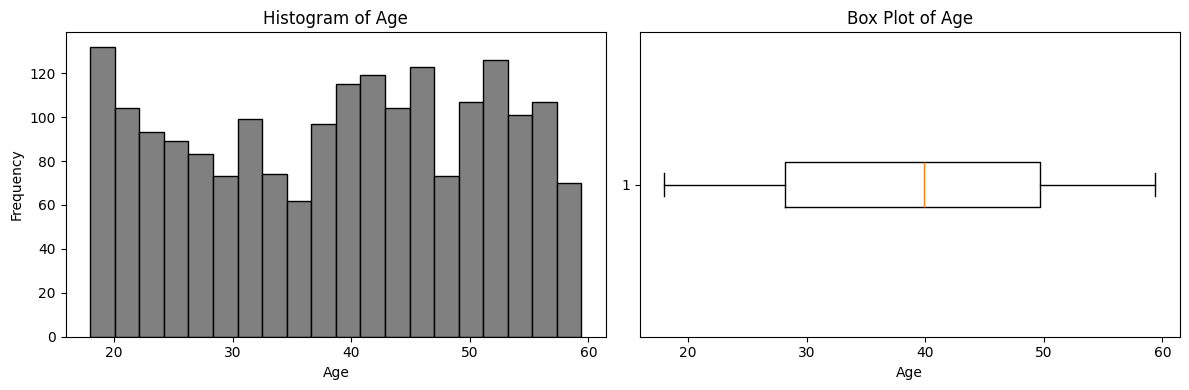

In [ ]:
plot_num("Age")

### Kolom Weight (kg)

Kolom weight bersifat right skewed / positive skew sebesar 0.77.

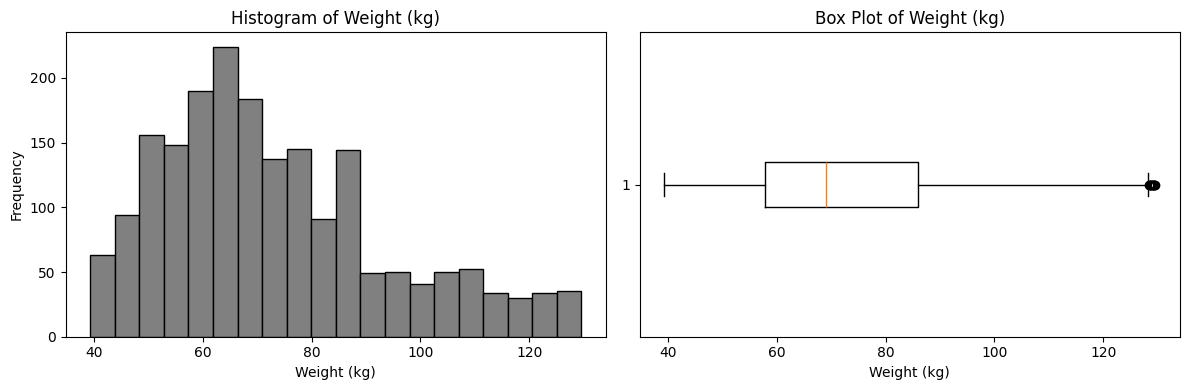

In [ ]:
plot_num("Weight (kg)")

### Kolom Height (m)
Sedikit positif skew sebesar 0.30. Terdapat data dominan di 1.62-1.64, 1.70-1.72, dan 1.74-1.76

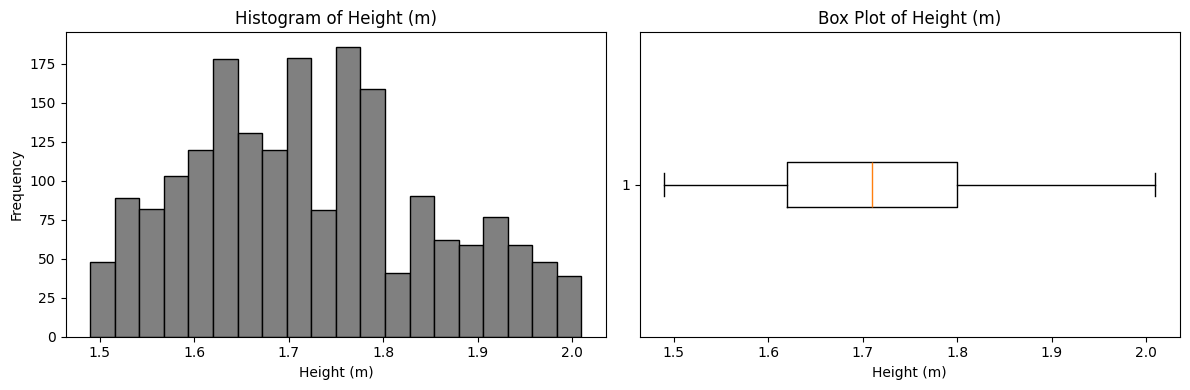

In [ ]:
plot_num("Height (m)")

### Kolom Avg_BPM

Seperti kolom 'Age' distribusi merata, tidak ada konsentrasi terhadap umur tertentu, ditunjukkan juga dengan nilai kurtosis -1.21.

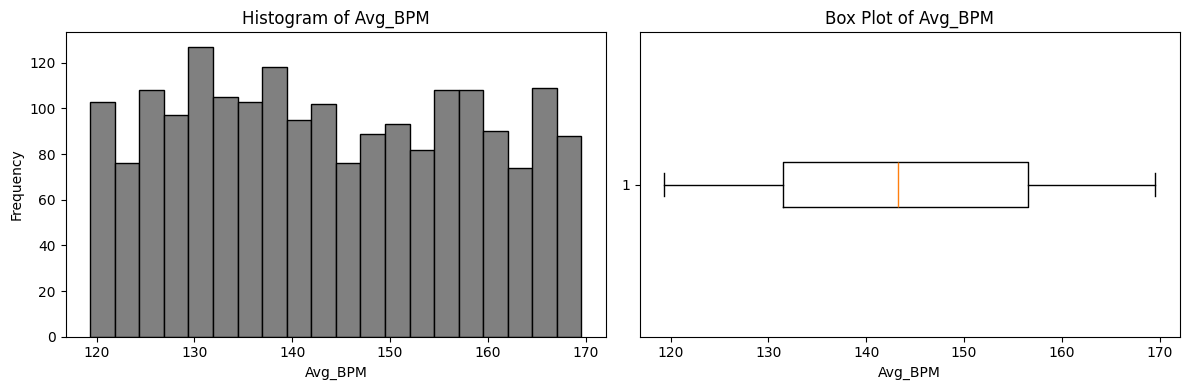

In [ ]:
plot_num("Avg_BPM")

### Kolom Session_Duration (hours)

Sangat mendekati distribusi normal, ditandai dengan mean, median, dan modus yang bernilai sama, yaitu 1.26. Selain itu, skewness bernilai -0.01 dan kurtosis bernilai -0.25. Outlier tidak ditemukan.

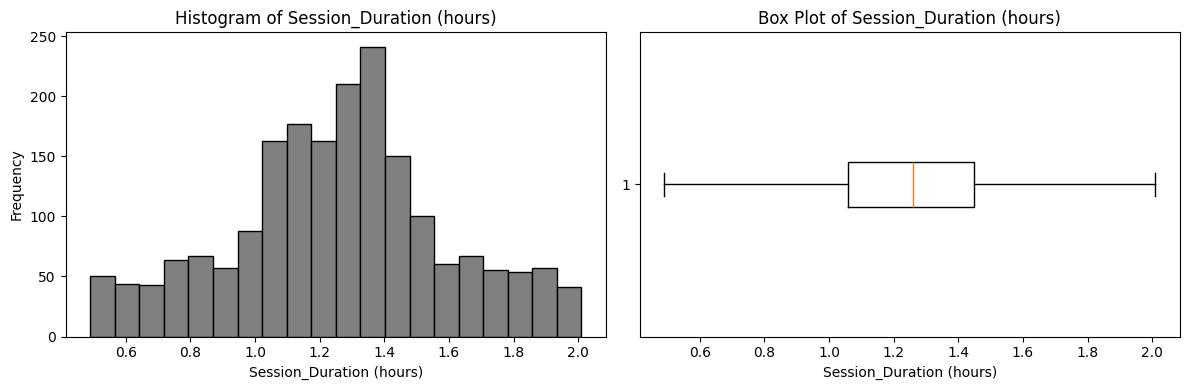

In [ ]:
plot_num("Session_Duration (hours)")

### Kolom Calories_Burned

Kolom bersifat positif skew 0.56, dengan frekuensi terbanyak di 1300-1400, tapi modus ada di 1248.00.

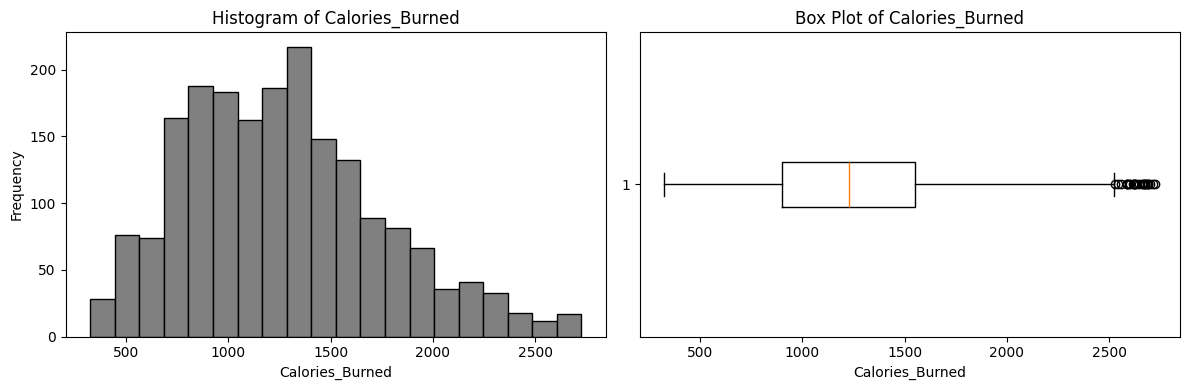

In [ ]:
plot_num("Calories_Burned")

### Kolom Fat_Percentage

Sepintas terlihat seperti condong ke kanan / negative skew, tapi nilai skewnessnya 0.10 dan hampir mendekati skewness normal. Hal ini disebabkan oleh banyaknya data persentasi Fat di angka 34-35%.

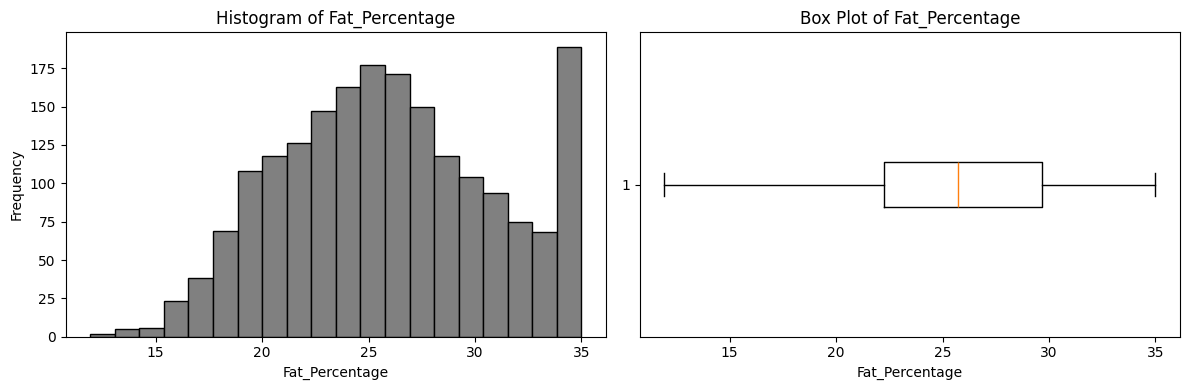

In [ ]:
plot_num("Fat_Percentage")

### Kolom Carbs

Kolom ini terlihat berat ke arah kiri dan bersifat positive skew sebesar 0.59.

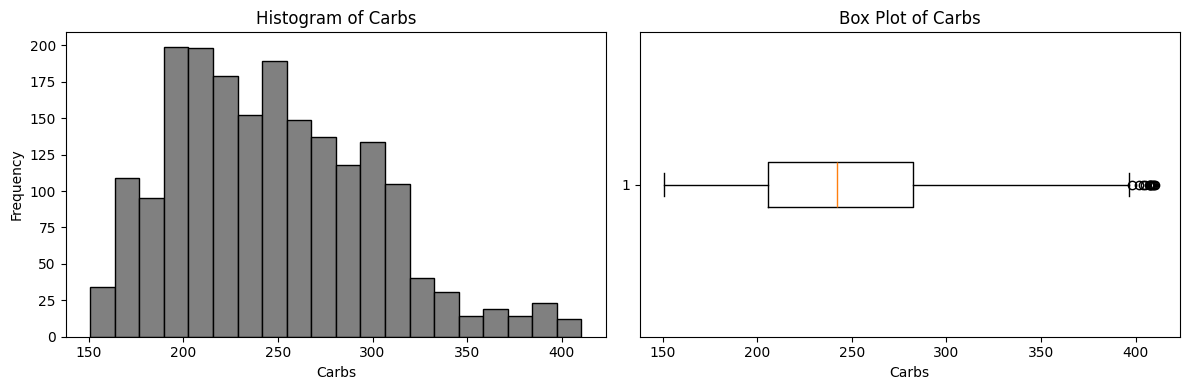

In [ ]:
plot_num("Carbs")

### Kolom Proteins

Kolom ini terlihat berat ke arah kiri dan bersifat positive skew sebesar 0.59, sama seperti Carbs. Namun, kolom ini memiliki banyak sekali modus.

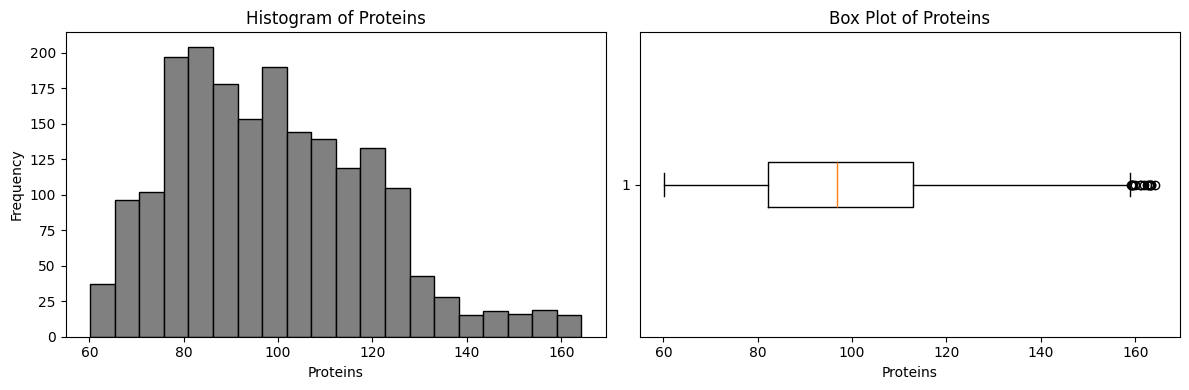

In [ ]:
plot_num("Proteins")

### Kolom Fats

Kolom ini terlihat berat ke arah kiri dan bersifat positive skew sebesar 0.58, hampir sama seperti Carbs dan Protein.

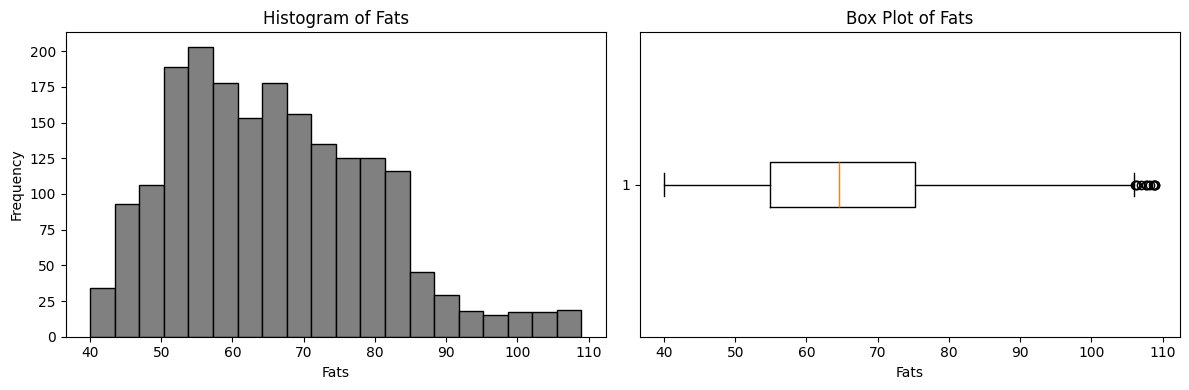

In [ ]:
plot_num("Fats")

### Kolom Calories

Kolom ini bersifat positive skew sebesar 0.66, dengan frekuensi paling banyak di 1800-1900 kalori.

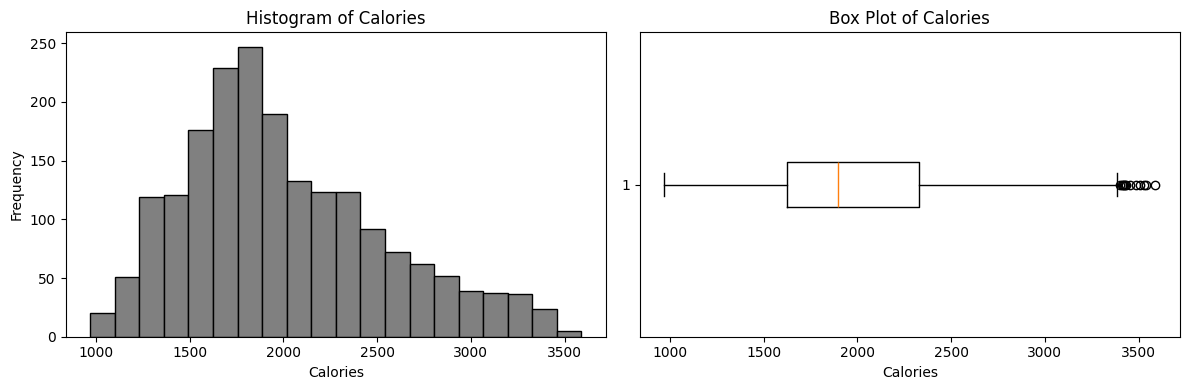

In [ ]:
plot_num("Calories")

### Kolom BMI

Kolom ini bersifat positive skew, dengan besar 0.83 dan kurtosis sebesar 0.79, artinya agak condong keatas.

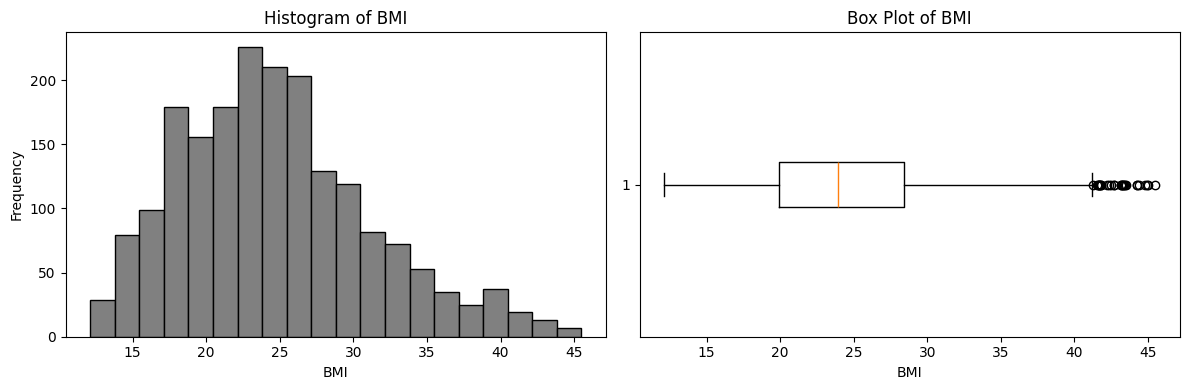

In [ ]:
plot_num("BMI")

### Kolom cal_balance

Kolom ini memiliki banyak modus, dan memiliki positive skew 0.32. Kurtosis mendekati normal, yaitu -0.02.

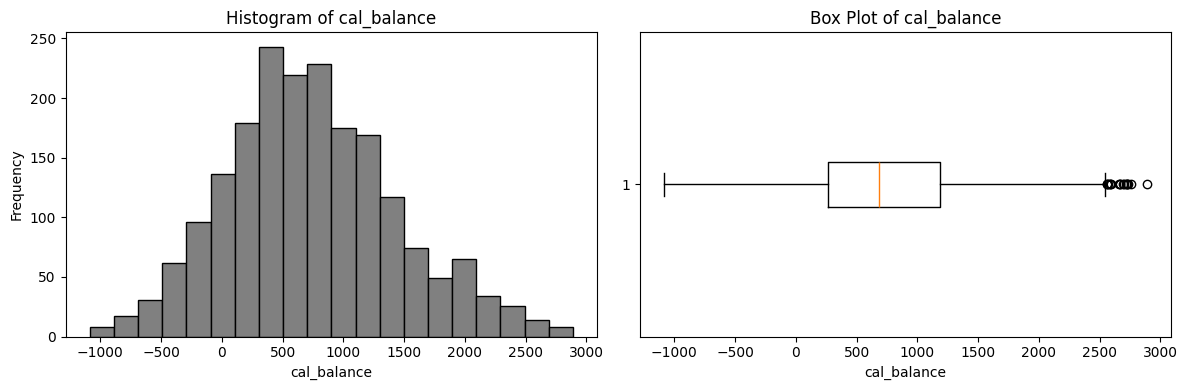

In [ ]:
plot_num("cal_balance")

### Kolom Gender

Proporsi dan jumlah kedua gender hampir sama, sehingga data tidak mengalami masalah imbalance pada kolom ini.

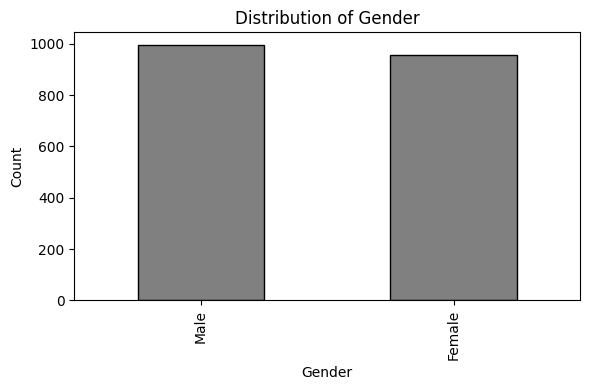

In [ ]:
plot_cat("Gender")

### Kolom Workout_Type

Proporsi dan jumlah keempat tipe olahraga ini terdistribusi merata, sehingga data tidak mengalami masalah imbalance pada kolom ini.

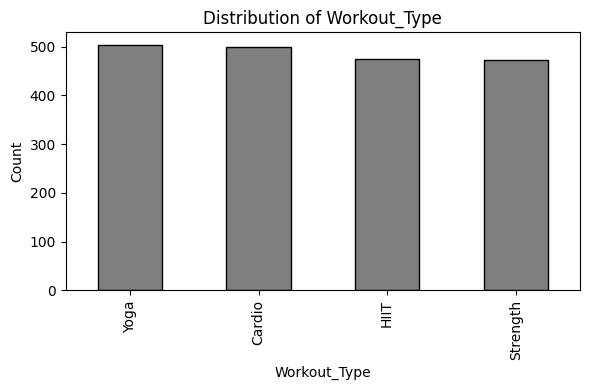

In [ ]:
plot_cat("Workout_Type")

### Kolom diet_type

Proporsi dan jumlah keenam tipe diet ini terdistribusi merata, sehingga data tidak mengalami masalah imbalance pada kolom ini.

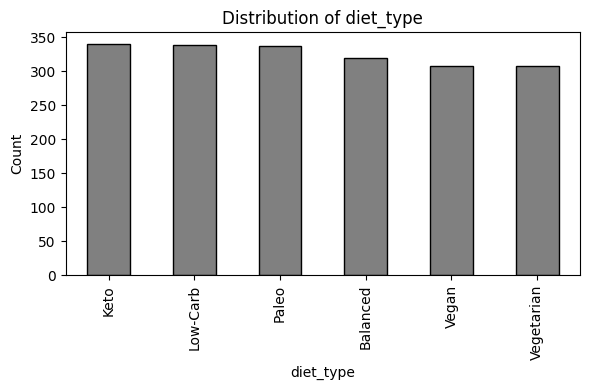

In [ ]:
plot_cat("diet_type")

## Nomor 4
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

*  Age: Hampir simetris tetapi sedikit condong ke kiri sehingga membentuk distribusi slightly left-skewed & low-peaked.
*  Weight (kg): Condong ke kanan dengan penyebaran luas sehingga membentuk distribusi right-skewed & agak flat.
*  Height (m): Hampir simetris tapi sedikit condong ke kanan sehingga membentuk distribusi slightly right-skewed & low-peaked.
*  Avg_BPM: Sedikit condong ke kanan dan memiliki banyak puncak sehingga membentuk distribusi slightly right-skewed & multimodal.
*  Session_Duration (hours): Paling mirip distribusi normal, simetris dengan puncak agak rendah, sehingga berdistribusi normal.
*  Calories_Burned: Jelas condong ke kanan dan puncaknya agak rendah sehingga membentuk distribusi right-skewed & agak flat.
*  Carbs: Condong ke kanan dengan puncak sedang sehingga membentuk distribusi right-skewed & mid-peaked.
*  Proteins: Condong ke kanan dan memiliki sangat banyak puncak sehingga membentuk distribusi right-skewed & strongly multimodal.
*  Fats: Condong ke kanan dan memiliki beberapa puncak sehingga membentuk distribusi right-skewed & sedikit multimodal.
*  Calories: Condong ke kanan dengan puncak rendah sehingga membentuk distribusi right-skewed & flat-peaked.
*  BMI: Condong ke kanan dengan puncak sedang sehingga membentuk distribusi right-skewed & mid-peaked.
*  cal_balance: Condong ke kanan dan memiliki banyak puncak sehingga membentuk distribusi right-skewed & multimodal.
*  Gender: Data menunjukkan distribusi yang hampir seragam (balanced distribution / uniform distribution), dengan jumlah keduanya sangat berdekatan tanpa dominasi kategori tertentu.
*  Workout_type: Data menunjukkan distribusi yang hampir seragam (balanced distribution / uniform distribution), dengan jumlah keduanya sangat berdekatan tanpa dominasi kategori tertentu.
*  diet_type: Data menunjukkan distribusi yang hampir seragam (balanced distribution / uniform distribution), dengan jumlah keduanya sangat berdekatan tanpa dominasi kategori tertentu.

# Soal Spesifik Dataset

Enam Langkah Testing:

1.  Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Nomor 5 : Hipotesis 1 Sampel

1. Organisasi Kesehatan Dunia (WHO) menyatakan bahwa BMI rata-rata populasi dewasa yang sehat seharusnya tidak melebihi 25. Periksalah apakah rata-rata BMI dari data individu ini kurang dari atau sama dengan 25?
2. Standar detak jantung rata-rata saat berolahraga untuk intensitas sedang adalah 140 BPM. Lembaga riset perlu memastikan apakah data yang dikumpulkan mencerminkan intensitas olahraga yang normal. Periksalah apakah rata-rata detak jantung (Avg_BPM) saat berolahraga bernilai 140 BPM?
3. Dari 500 individu pertama dalam dataset (baris teratas), lembaga ingin memverifikasi apakah rata-rata durasi sesi olahraga berbeda dari 1.3 jam. Periksalah apakah rata-rata Session_Duration dari 500 individu pertama tidak sama dengan 1.3 jam?
4. Menurut standar kesehatan, minimal 25% dari populasi seharusnya memiliki surplus kalori (cal_balance positif) untuk menjaga energi harian. Apakah proporsi individu dengan surplus kalori (cal_balance > 0) lebih besar dari 25% dalam dataset keseluruhan?


### 5.1
Organisasi Kesehatan Dunia (WHO) menyatakan bahwa BMI rata-rata populasi dewasa yang sehat seharusnya tidak melebihi 25. Periksalah apakah rata-rata BMI dari data individu ini kurang dari atau sama dengan 25?

In [ ]:
mean = data['BMI'].mean()
std = data['BMI'].std()
n = len(data)
alpha = 0.05

print("Hipotesis:")
print("H0 : μ = 25  (setara μ <= 25)")
print("H1 : μ > 25")
print("\nalpha = 0.05\n")

# Hitung z
z = (mean - 25) / (std / np.sqrt(n))
print("z :", z)
print(f"Karena {z:.2f} < 1.645, maka gagal tolak H0.")
print()

# Hitung p-value
p_value = 1 - stats.norm.cdf(z)
print("p-value :", p_value)
print(f"Karena {p_value:.2f} > 0.05, maka gagal tolak H0 -> rata-rata BMI dari data ini tidak melebihi 25.")


Hipotesis:
H0 : μ = 25  (setara μ <= 25)
H1 : μ > 25

alpha = 0.05

z : -1.9436683446912506
Karena -1.94 < 1.645, maka gagal tolak H0.

p-value : 0.974032270854635
Karena 0.97 > 0.05, maka gagal tolak H0 -> rata-rata BMI dari data ini tidak melebihi 25.


### 5.2
Standar detak jantung rata-rata saat berolahraga untuk intensitas sedang adalah 140 BPM. Lembaga riset perlu memastikan apakah data yang dikumpulkan mencerminkan intensitas olahraga yang normal. Periksalah apakah rata-rata detak jantung (Avg_BPM) saat berolahraga bernilai 140 BPM?

In [ ]:
mean = data['Avg_BPM'].mean()
standar_dev = data['Avg_BPM'].std()
length = len(data)
alpha = 0.05

print("Hipotesis (uji dua arah):")
print("H0 : μ = 140")
print("H1 : μ != 140")
print("\nalpha = 0.05\n")

# z kritis untuk uji dua arah
z_kritis = stats.norm.ppf(1 - alpha/2)
print("z kritis :", z_kritis)

# hitung z
z = (mean - 140) / (standar_dev / np.sqrt(length))
print("z :", z)
print("|z| :", abs(z))
print(f"Karena |z| = {abs(z):.2f} tidak < {z_kritis:.2f}, maka tolak H0.\n")

# hitung p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print("p-value :", p_value)
print(f"Karena {p_value:.2f} tidak > 0.05, maka tolak H0 -> rata-rata tidak sama dengan 140 bpm.")


Hipotesis (uji dua arah):
H0 : μ = 140
H1 : μ != 140

alpha = 0.05

z kritis : 1.959963984540054
z : 11.96038823759056
|z| : 11.96038823759056
Karena |z| = 11.96 tidak < 1.96, maka tolak H0.

p-value : 0.0
Karena 0.00 tidak > 0.05, maka tolak H0 -> rata-rata tidak sama dengan 140 bpm.


### 5.3
Dari 500 individu pertama dalam dataset (baris teratas), lembaga ingin memverifikasi apakah rata-rata durasi sesi olahraga berbeda dari 1.3 jam. Periksalah apakah rata-rata Session_Duration dari 500 individu pertama tidak sama dengan 1.3 jam?

In [ ]:
mean = data['Session_Duration (hours)'].values[0:500].mean()
std = data['Session_Duration (hours)'].values[0:500].std()
n = len(data['Session_Duration (hours)'].values[0:500])
alpha = 0.05

print("Hipotesis (uji dua arah):")
print("H0 : μ = 1.3")
print("H1 : μ != 1.3")
print("\nalpha = 0.05\n")

# z kritis
z_kritis = stats.norm.ppf(1 - alpha/2)
print("z kritis :", z_kritis)

# Hitung z
z = (mean - 1.3) / (std / np.sqrt(n))
print("z :", z)
print("|z| :", abs(z))
print(f"Karena |z| = {abs(z):.2f} > 1.96, maka H0 ditolak.")
print()

# Hitung p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print("p-value :", p_value)
print(f"Karena {p_value:.4f} < 0.05, maka H0 ditolak -> rata-rata tidak sama dengan 1.3 jam.")


Hipotesis (uji dua arah):
H0 : μ = 1.3
H1 : μ != 1.3

alpha = 0.05

z kritis : 1.959963984540054
z : -2.0821928689567057
|z| : 2.0821928689567057
Karena |z| = 2.08 > 1.96, maka H0 ditolak.

p-value : 0.03732485637738914
Karena 0.0373 < 0.05, maka H0 ditolak -> rata-rata tidak sama dengan 1.3 jam.


### 5.4
Menurut standar kesehatan, minimal 25% dari populasi seharusnya memiliki surplus kalori (cal_balance positif) untuk menjaga energi harian. Apakah proporsi individu dengan surplus kalori (cal_balance > 0) lebih besar dari 25% dalam dataset keseluruhan?

In [ ]:
length = len(data['cal_balance'])
data_cal_balance_pos = (data['cal_balance'] > 0).sum()
p_hat = data_cal_balance_pos / length
p0 = 0.25
q0 = 1 - p0
alpha = 0.05

print("Hipotesis:")
print("H0 : p = 0.25")
print("H1 : p > 0.25")
print("\nalpha = 0.05\n")

# Hitung z
z = (p_hat - p0) / np.sqrt(p0 * q0 / length)
print("z :", z)
print(f"Karena {z:.2f} > 1.645, maka H0 ditolak.")
print()

# Hitung p-value
# Menggunakan 1 - cdf karena H1 adalah ">" (Uji satu arah kanan)
p_value = 1 - stats.norm.cdf(z)
print("p-value :", p_value)
print(f"Karena {p_value} < 0.05, maka H0 ditolak -> Proporsi individu dengan surplus kalori terbukti lebih besar dari 25%.")

Hipotesis:
H0 : p = 0.25
H1 : p > 0.25

alpha = 0.05

z : 62.492727750501295
Karena 62.49 > 1.645, maka H0 ditolak.

p-value : 0.0
Karena 0.0 < 0.05, maka H0 ditolak -> Proporsi individu dengan surplus kalori terbukti lebih besar dari 25%.


## Nomor 6 : Hipotesis 2 Sampel
Lembaga riset membagi data individu menjadi dua bagian untuk analisis komparatif, yaitu:
- Kelompok A: 1000 individu pertama (data awal yang masuk penelitian)
- Kelompok B: 1000 individu terakhir (data yang baru saja masuk) -> disini dibagi 2 dari sisa

1. Periksa apakah rata-rata berat badan (Weight) individu dari kelompok A sama dengan rata-rata berat badan individu dari kelompok B?
2. Lembaga ingin mengetahui apakah kelompok yang masuk lebih awal cenderung mengonsumsi kalori lebih tinggi. Periksalah apakah rata-rata asupan kalori (Calories) kelompok A lebih besar dari kelompok B?
3. Untuk memastikan konsistensi data, lembaga perlu memeriksa variabilitas durasi olahraga. Periksalah apakah variansi Session_Duration dari kelompok A sama dengan variansi Session_Duration dari kelompok B?
4. Apakah proporsi individu yang melakukan olahraga intensitas tinggi (Workout_Type = 'HIIT' atau 'Strength') pada kelompok A berbeda dengan proporsi pada kelompok B?

In [ ]:
length = len(data)
even_length = length - (length % 2)  # buang 1 data terakhir agar genap, karena jumlah data setelah outlier dihilangkan nilainya ganjil.

data_even = data[:even_length]

data_A = data_even[:even_length//2]
data_B = data_even[even_length//2:]

### 6.1
Periksa apakah rata-rata berat badan (Weight) individu dari kelompok A sama dengan rata-rata berat badan individu dari kelompok B?

In [ ]:
berat_A = data_A['Weight (kg)']
berat_B = data_B['Weight (kg)']

mean_A = berat_A.mean()
mean_B = berat_B.mean()
std_A = berat_A.std()
std_B = berat_B.std()

na = len(berat_A)
nb = len(berat_B)
alpha = 0.05

print("Hipotesis:")
print("H0 : μA - μB = 0")
print("H1 : μA - μB != 0")
print("\nalpha = 0.05\n")

# Hitung t
degree_freedom = na + nb - 2
sp2 = ((na - 1) * std_A**2 + (nb - 1) * std_B**2) / degree_freedom
t_score = (mean_A - mean_B) / np.sqrt(sp2/na + sp2/nb)
t_crit = stats.t.ppf(1 - alpha/2, degree_freedom)

print("t :", t_score)

print(f"Karena |{t_score:.2f}| < {t_crit:.3f}, maka gagal tolak H0.")
print()

# Hitung p-value
p_value = 2 * stats.t.cdf(-abs(t_score), degree_freedom)
print("p-value :", p_value)

print(f"Karena {p_value:.4f} > 0.05, maka gagal tolak H0 -> Rata-rata berat sama.")

Hipotesis:
H0 : μA - μB = 0
H1 : μA - μB != 0

alpha = 0.05

t : -1.6481403293330978
Karena |-1.65| < 1.961, maka gagal tolak H0.

p-value : 0.0994851401625192
Karena 0.0995 > 0.05, maka gagal tolak H0 -> Rata-rata berat sama.


### 6.2
Lembaga ingin mengetahui apakah kelompok yang masuk lebih awal cenderung mengonsumsi kalori lebih tinggi. Periksalah apakah rata-rata asupan kalori (Calories) kelompok A lebih besar dari kelompok B?

In [ ]:
kal_A = data_A['Calories']
kal_B = data_B['Calories']

mean_A = kal_A.mean()
mean_B = kal_B.mean()
std_A = kal_A.std()
std_B = kal_B.std()

na = len(kal_A)
nb = len(kal_B)
alpha = 0.05

print("Hipotesis:")
print("H0 : μA <= μB")
print("H1 : μA > μB")
print("\nalpha = 0.05\n")

# Hitung t
degree_freedom = na + nb - 2
sp2 = ((na - 1) * std_A**2 + (nb - 1) * std_B**2) / degree_freedom
t_score = (mean_A - mean_B) / np.sqrt(sp2/na + sp2/nb)
# Critical value untuk one-tailed test (kanan)
t_crit = stats.t.ppf(1 - alpha, degree_freedom)

print("t :", t_score)
print(f"crit high: {t_crit}")

print(f"Karena {t_score:.2f} < {t_crit:.3f}, maka gagal tolak H0.")
print()

# Hitung p-value (Right-tailed)
p_value = 1 - stats.t.cdf(t_score, degree_freedom)
print("p-value :", p_value)

print(f"Karena {p_value:.4f} > 0.05, maka gagal tolak H0 (Tidak cukup bukti rata-rata A > B).")

Hipotesis:
H0 : μA <= μB
H1 : μA > μB

alpha = 0.05

t : -1.2961294085409727
crit high: 1.6456362236987263
Karena -1.30 < 1.646, maka gagal tolak H0.

p-value : 0.9024577795671448
Karena 0.9025 > 0.05, maka gagal tolak H0 (Tidak cukup bukti rata-rata A > B).


### 6.3
Untuk memastikan konsistensi data, lembaga perlu memeriksa variabilitas durasi olahraga. Periksalah apakah variansi Session_Duration dari kelompok A sama dengan variansi Session_Duration dari kelompok B?

In [ ]:
var_A = data_A['Session_Duration (hours)'].var()
var_B = data_B['Session_Duration (hours)'].var()
nA = len(data_A)
nB = len(data_B)
alpha = 0.05

print("Hipotesis:")
print("H0 : std^2_A = std^2_B")
print("H1 : std^2_A != std^2_B")
print("\nalpha = 0.05\n")

# Hitung F
F = var_A / var_B
v1 = nA - 1
v2 = nB - 1
F_upper = stats.f.ppf(1 - alpha/2, v1, v2)
F_lower = stats.f.ppf(alpha/2, v1, v2)

print("F :", F)
print("F crit lower:", F_lower)
print("F crit upper:", F_upper)

print(f"Karena {F:.2f} > {F_upper:.2f}. Salah satu kondisi terpenuhi, maka H0 ditolak -> variansi beda.")
print()

# Hitung p-value
# Rumus p-value untuk F-test dua arah
p_value = 2 * min(stats.f.cdf(F, v1, v2), 1 - stats.f.cdf(F, v1, v2))
print("p-value :", p_value)


print(f"Karena {p_value:.4f} < 0.05, maka H0 ditolak -> variansi beda.")

Hipotesis:
H0 : std^2_A = std^2_B
H1 : std^2_A != std^2_B

alpha = 0.05

F : 1.1937852724064741
F crit lower: 0.8819004097043606
F crit upper: 1.1339148831274837
Karena 1.19 > 1.13. Salah satu kondisi terpenuhi, maka H0 ditolak -> variansi beda.

p-value : 0.00575369265648451
Karena 0.0058 < 0.05, maka H0 ditolak -> variansi beda.


### 6.4
Apakah proporsi individu yang melakukan olahraga intensitas tinggi (Workout_Type = 'HIIT' atau 'Strength') pada kelompok A berbeda dengan proporsi pada kelompok B?

In [ ]:
idv_A = data_A['Workout_Type']
idv_B = data_B['Workout_Type']

highA = idv_A.isin(['HIIT', 'Strength']).astype(int)
highB = idv_B.isin(['HIIT', 'Strength']).astype(int)

xA = highA.sum()
nA = len(highA)
xB = highB.sum()
nB = len(highB)
pA = xA / nA
pB = xB / nB
p_hat = (xA + xB) / (nA + nB)
alpha = 0.05

print("Hipotesis:")
print("H0 : pA = pB")
print("H1 : pA != pB")
print("\nalpha = 0.05\n")

# Hitung z
z = (pA - pB) / np.sqrt(p_hat * (1 - p_hat) * (1 / nA + 1 / nB))
print("z :", z)

print(f"Karena {z:.2f} < 1.96, maka gagal tolak H0 -> proporsi sama.")
print()

# Hitung p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print("p-value :", p_value)

print(f"Karena {p_value:.2f} > 0.05, maka gagal tolak H0 -> proporsi sama.")

Hipotesis:
H0 : pA = pB
H1 : pA != pB

alpha = 0.05

z : 0.4530845740798355
Karena 0.45 < 1.96, maka gagal tolak H0 -> proporsi sama.

p-value : 0.6504878427591732
Karena 0.65 > 0.05, maka gagal tolak H0 -> proporsi sama.


## Lampiran
Link video: https://drive.google.com/file/d/1ZovQx63O6HFjRNHMS127DJgCdbwJaDql/view?usp=sharing